In [1]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Acessa a API do Portal da Transparência para verificar despesas do Ministério da Ciência, Tecnologia, Inovações e Comunicações
#

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Documentação em: http://www.transparencia.gov.br/swagger-ui.html#/
# Procurar em Despesas Públicas

In [1]:
# Para saber qual foi a última atualização de dados: http://portaldatransparencia.gov.br/origem-dos-dados

In [3]:
# Muda o formato de apresentação de números float em dataframes do pandas

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# Despesas Públicas - Consulta as despesas dos órgão do Poder Executivo Federal
# Código '24000' é o MCTIC no SIAFI (Sistema Integrado de Administração Financeira do Governo Federal)
# É o parâmetro orgaoSuperior=24000

In [7]:
# Consulta dos últimos dez anos (mas depois vi que só existem dados a partir de 2014)

In [8]:
for num in range(2008, 2019):
    ano = str(num)
    # Parâmetro obrigatório é o orgaoSuperior
    # Número de páginas pode variar de órgão para órgão, mas no MCTIC é sempre 1
    url = f'http://www.transparencia.gov.br/api-de-dados/despesas/por-orgao?ano={ano}&orgaoSuperior=24000&pagina=1'
    print(ano)
    
    try:
        r = requests.get(url)
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc) 
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        
    despesa = r.json()
    
    df_parcial = pd.DataFrame(despesa)
    
    if num == 2008:
        df_despesa = df_parcial
    elif num > 2008:
        df_despesa = df_despesa.append(df_parcial)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [9]:
df_despesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 11
Data columns (total 8 columns):
ano                    59 non-null int64
codigoOrgao            59 non-null object
codigoOrgaoSuperior    59 non-null object
empenhado              59 non-null object
liquidado              59 non-null object
orgao                  59 non-null object
orgaoSuperior          59 non-null object
pago                   59 non-null object
dtypes: int64(1), object(7)
memory usage: 4.1+ KB


In [10]:
df_despesa.head()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago
0,2014,20502,24000,"5.925.207.329,75","5.827.691.547,80",FINANCIADORA DE ESTUDOS E PROJETOS,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","5.809.585.355,44"
1,2014,20302,24000,"317.603.403,59","317.603.403,59",NUCLEBRAS EQUIPAMENTOS PESADOS S/A,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","291.305.978,28"
2,2014,24000,24000,"1.868.824.695,25","1.577.268.068,66","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES ...","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","1.557.710.671,60"
3,2014,20402,24000,"125.149.724,40","50.724.125,33",AGENCIA ESPACIAL BRASILEIRA - AEB,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","50.695.145,33"
4,2014,41231,24000,"459.446.916,32","420.621.768,15",AGENCIA NACIONAL DE TELECOMUNICACOES,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","420.621.054,22"


In [11]:
df_despesa.tail()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago
7,2018,20302,24000,"399.467.296,15","318.212.840,36",NUCLEBRAS EQUIPAMENTOS PESADOS S/A,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","310.257.787,42"
8,2018,24000,24000,"3.549.578.226,56","2.798.037.464,27","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES ...","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","2.796.254.596,36"
9,2018,41232,24000,"61.281,00","61.281,00",FUNDO DE UNIVERS.DOS SERV.DE TELECOMUNICACOES,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","61.281,00"
10,2018,20303,24000,"710.483.835,89","405.416.726,03",INDUSTRIAS NUCLEARES DO BRASIL S/A,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","420.581.032,86"
11,2018,41231,24000,"510.629.659,28","387.238.073,41",AGENCIA NACIONAL DE TELECOMUNICACOES,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","387.341.449,74"


In [9]:
# Transforma coluna 'pago' em numérica

In [16]:
def limpeza1(linha):
    valor = linha["pago"]
    valor = valor.replace('.', '')
    valor = valor.replace(',', '.')
    return valor

In [17]:
df_despesa["valor_pago"] = df_despesa.apply(limpeza1, axis=1)
df_despesa["valor_pago"] = df_despesa.valor_pago.astype('float64')

In [18]:
df_despesa.head()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago,valor_pago
0,2014,20502,24000,"5.925.207.329,75","5.827.691.547,80",FINANCIADORA DE ESTUDOS E PROJETOS,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","5.809.585.355,44","5,809,585,355.44"
1,2014,20302,24000,"317.603.403,59","317.603.403,59",NUCLEBRAS EQUIPAMENTOS PESADOS S/A,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","291.305.978,28","291,305,978.28"
2,2014,24000,24000,"1.868.824.695,25","1.577.268.068,66","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES ...","MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","1.557.710.671,60","1,557,710,671.60"
3,2014,20402,24000,"125.149.724,40","50.724.125,33",AGENCIA ESPACIAL BRASILEIRA - AEB,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","50.695.145,33","50,695,145.33"
4,2014,41231,24000,"459.446.916,32","420.621.768,15",AGENCIA NACIONAL DE TELECOMUNICACOES,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","420.621.054,22","420,621,054.22"


## Despesas por ano

In [19]:
df_despesa.groupby("ano").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

,ano,valor_pago
0,2014,"13,082,008,854.37"
3,2017,"9,412,069,205.73"
2,2016,"7,617,420,559.22"
1,2015,"7,470,391,492.24"
4,2018,"7,156,814,792.26"


In [20]:
gastos_anuais = df_despesa.groupby("ano").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

In [21]:
gastos_anuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
ano           5 non-null int64
valor_pago    5 non-null float64
dtypes: float64(1), int64(1)
memory usage: 120.0 bytes


In [22]:
gastos_anuais.reset_index()

,index,ano,valor_pago
0,0,2014,"13,082,008,854.37"
1,3,2017,"9,412,069,205.73"
2,2,2016,"7,617,420,559.22"
3,1,2015,"7,470,391,492.24"
4,4,2018,"7,156,814,792.26"


In [ ]:
# Cria gráfico

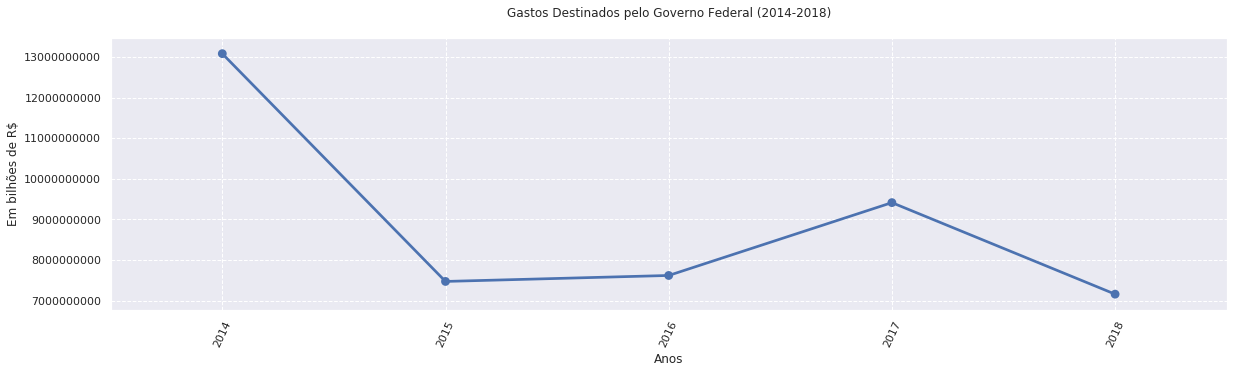

In [23]:
sns.set(rc={'figure.figsize':(20, 5)}) # fixa o tamanho
p = sns.pointplot(x='ano', y='valor_pago', data=gastos_anuais) # eixos e fonte de dados

plt.xticks(rotation=65) # rotação do eixo x
plt.ticklabel_format(style='plain', axis='y') # retira a menção da escala 
plt.grid(True, linestyle="--") # grid
plt.title("Gastos Destinados pelo Governo Federal (2014-2018)\n")
plt.xlabel("Anos")
plt.ylabel("Em bilhões de R$")
fig = p.get_figure() # salva gráfico como arquivo
fig.savefig("gastos_anuais.png") # salva gráfico como arquivo
plt.show()

## Despesas por órgão

In [24]:
df_despesa.groupby("orgao").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

,orgao,valor_pago
10,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES ...","11,260,244,094.58"
4,CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"9,149,672,548.34"
5,FINANCIADORA DE ESTUDOS E PROJETOS,"6,140,332,102.04"
7,FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO,"5,943,676,153.29"
3,COMISSAO NACIONAL DE ENERGIA NUCLEAR,"4,286,812,737.05"
9,INDUSTRIAS NUCLEARES DO BRASIL S/A,"2,773,400,969.45"
1,AGENCIA NACIONAL DE TELECOMUNICACOES,"2,150,346,539.30"
11,NUCLEBRAS EQUIPAMENTOS PESADOS S/A,"1,684,844,875.48"
8,FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES,"862,591,530.26"
2,CENTRO NAC DE TECN ELETRONICA AVANCADA S/A,"358,091,695.27"


In [25]:
# Tabela dinâmica por ano e órgão

In [26]:
pd.pivot_table(df_despesa,index=["ano","orgao"], values=["valor_pago"], aggfunc=np.sum)

valor_pago
ano  orgao                                                              
2014 AGENCIA ESPACIAL BRASILEIRA - AEB                     50,695,145.33
     AGENCIA NACIONAL DE TELECOMUNICACOES                 420,621,054.22
     CENTRO NAC DE TECN ELETRONICA AVANCADA S/A            86,183,296.56
     COMISSAO NACIONAL DE ENERGIA NUCLEAR                 840,630,408.69
     CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO       2,737,416,490.27
     FINANCIADORA DE ESTUDOS E PROJETOS                 5,809,585,355.44
     FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO        546,332,259.55
     FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES         178,308,198.67
     INDUSTRIAS NUCLEARES DO BRASIL S/A                   563,219,995.76
     MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES -... 1,557,710,671.60
     NUCLEBRAS EQUIPAMENTOS PESADOS S/A                   291,305,978.28
2015 AGENCIA ESPACIAL BRASILEIRA - AEB                     16,022,001.53
     AGENCIA NACIONAL DE TELECOMUNICACOES                 415,990,247.73
     CENTRO NAC DE TECN ELETRONICA AVANCADA S/A            72,736,343.52
     COMISSAO NACIONAL DE ENERGIA NUCLEAR                 875,045,111.23
     CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO       2,151,052,928.14
     FINANCIADORA DE ESTUDOS E PROJETOS                    16,255,816.89
     FUNDO DE UNIVERS.DOS SERV.DE TELECOMUNICACOES              4,435.90
     FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO      1,352,735,189.25
     FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES         224,372,956.35
     INDUSTRIAS NUCLEARES DO BRASIL S/A                   542,069,417.35
     MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES -... 1,477,754,679.34
     NUCLEBRAS EQUIPAMENTOS PESADOS S/A                   326,352,365.01
2016 AGENCIA ESPACIAL BRASILEIRA - AEB                     20,774,542.80
     AGENCIA NACIONAL DE TELECOMUNICACOES                 450,210,227.46
     CENTRO NAC DE TECN ELETRONICA AVANCADA S/A            67,795,562.59
     COMISSAO NACIONAL DE ENERGIA NUCLEAR                 904,876,358.48
     CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO       1,509,921,494.28
     FINANCIADORA DE ESTUDOS E PROJETOS                    33,695,768.19
     FUNDO DE UNIVERS.DOS SERV.DE TELECOMUNICACOES            101,419.00
     FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO      1,456,618,566.10
     FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES         227,710,444.05
     INDUSTRIAS NUCLEARES DO BRASIL S/A                   640,433,076.40
     MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES -... 1,940,339,298.91
     NUCLEBRAS EQUIPAMENTOS PESADOS S/A                   364,943,800.96
2017 AGENCIA ESPACIAL BRASILEIRA - AEB                     20,417,306.72
     AGENCIA NACIONAL DE TELECOMUNICACOES                 476,183,560.15
     CENTRO NAC DE TECN ELETRONICA AVANCADA S/A            74,365,277.23
     COMISSAO NACIONAL DE ENERGIA NUCLEAR                 931,413,729.82
     CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO       1,512,458,592.69
     FINANCIADORA DE ESTUDOS E PROJETOS                   150,231,499.39
     FUNDO DE UNIVERS.DOS SERV.DE TELECOMUNICACOES            101,000.00
     FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO      1,539,531,036.89
     FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES         220,099,963.58
     INDUSTRIAS NUCLEARES DO BRASIL S/A                   607,097,447.08
     MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES -... 3,488,184,848.37
     NUCLEBRAS EQUIPAMENTOS PESADOS S/A                   391,984,943.81
2018 AGENCIA ESPACIAL BRASILEIRA - AEB                     20,514,526.48
     AGENCIA NACIONAL DE TELECOMUNICACOES                 387,341,449.74
     CENTRO NAC DE TECN ELETRONICA AVANCADA S/A            57,011,215.37
     COMISSAO NACIONAL DE ENERGIA NUCLEAR                 734,847,128.83
     CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO       1,238,823,042.96
     FINANCIADORA DE ESTUDOS E PROJETOS                   130,563,662.13
     FUNDO DE UNIVERS.DOS SERV.DE TELECOMUNICAC

## Recorte do CNPq

In [27]:
cnpq = df_despesa[(df_despesa['codigoOrgao'] == '20501')]

In [28]:
cnpq

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago,valor_pago
9,2014,20501,24000,"3.732.532.995,56","2.804.913.901,24",CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","2.737.416.490,27","2,737,416,490.27"
4,2015,20501,24000,"3.215.485.037,14","2.340.679.465,77",CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","2.151.052.928,14","2,151,052,928.14"
6,2016,20501,24000,"1.939.401.134,76","1.517.970.033,60",CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","1.509.921.494,28","1,509,921,494.28"
9,2017,20501,24000,"1.915.126.935,43","1.543.172.385,24",CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","1.512.458.592,69","1,512,458,592.69"
5,2018,20501,24000,"1.391.808.300,62","1.268.297.169,20",CONSELHO NACIONAL DE DES.CIENT.E TECNOLOGICO,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES","1.238.823.042,96","1,238,823,042.96"


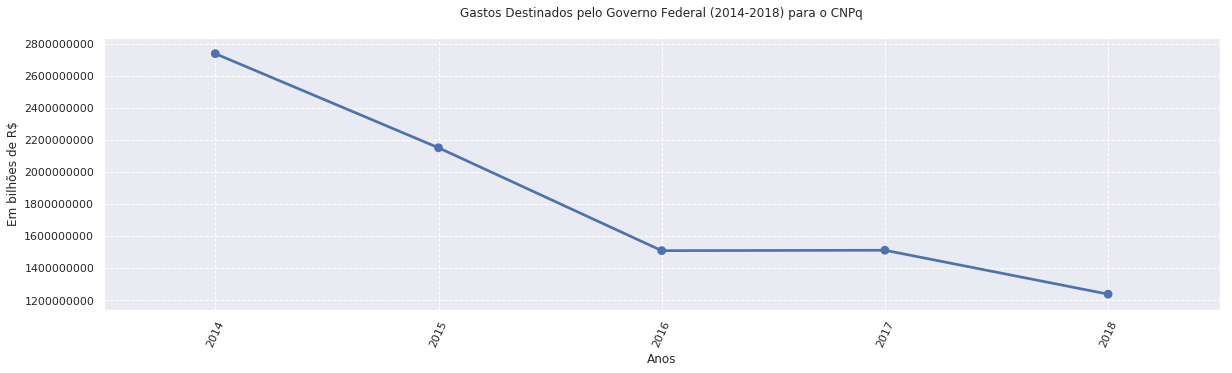

In [29]:
sns.set(rc={'figure.figsize':(20, 5)}) # fixa o tamanho
p = sns.pointplot(x='ano', y='valor_pago', data=cnpq)

plt.xticks(rotation=65)
plt.ticklabel_format(style='plain', axis='y') # retira a menção da escala 
plt.grid(True, linestyle="--")
plt.title("Gastos Destinados pelo Governo Federal (2014-2018) para o CNPq\n")
plt.xlabel("Anos")
plt.ylabel("Em bilhões de R$")
fig = p.get_figure() # salva gráfico como arquivo
fig.savefig("gastos_anuais_cnpq.png") # salva gráfico como arquivo
plt.show()

## Contratos do CNPq

In [ ]:
# Documentação em: http://www.transparencia.gov.br/swagger-ui.html#/
# Procurar em Contratos do Poder Executivo Federal 

In [30]:
# A consulta de contratos na API é de um mês por vez

In [31]:
dia_inicial = '01'
dia_final = '31'
codigoOrgao = '20501'

In [32]:
for vez in range(2014, 2019):
    ano = str(vez)
    print(ano)
    
    for num in range(1, 13): # Iteração pelos 12 meses
        if num <= 9:
            mes = '0' + str(num)
        else:
            mes = str(num)
    
        url = f'http://www.portaldatransparencia.gov.br/api-de-dados/contratos?dataInicial={dia_inicial}%2F{mes}%2F{ano}&dataFinal={dia_final}%2F{mes}%2F{ano}&codigoOrgao={codigoOrgao}&pagina=1'
    
        try: 
            r = requests.get(url)
        except requests.exceptions.HTTPError as errh:
            print ("Http Error:",errh)
        except requests.exceptions.ConnectionError as errc:
            print ("Error Connecting:",errc)
        except requests.exceptions.Timeout as errt:
            print ("Timeout Error:",errt)
        except requests.exceptions.RequestException as err:
            print ("OOps: Something Else",err)
        
        contratos = r.json()
    
        df_parcial = pd.DataFrame(contratos)
    
        if vez == 2014 and num == 1:
            raw_df = df_parcial
        elif num > 1:
            raw_df = raw_df.append(df_parcial)

2014
2015
2016
2017
2018


In [33]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 0
Data columns (total 13 columns):
contrato              0 non-null object
dataAssinatura        63 non-null object
dataFimVigencia       3 non-null object
dataInicioVigencia    63 non-null object
dataPublicacaoDOU     63 non-null object
dimCompra             63 non-null object
fornecedor            63 non-null object
id                    63 non-null int64
modalidadeCompra      0 non-null object
situacaoContrato      0 non-null object
unidadeGestora        63 non-null object
valorFinalCompra      63 non-null float64
valorInicialCompra    63 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 6.9+ KB


In [34]:
raw_df.reset_index().head()

,index,contrato,dataAssinatura,dataFimVigencia,dataInicioVigencia,dataPublicacaoDOU,dimCompra,fornecedor,id,modalidadeCompra,situacaoContrato,unidadeGestora,valorFinalCompra,valorInicialCompra
0,0,None,17/03/2014,None,17/03/2014,29/04/2014,"{'numero': '000072014', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'COMPANH...",11103280,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","186,451.20","186,451.20"
1,1,None,08/01/2016,None,08/01/2016,10/02/2016,"{'numero': '000012016', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",18307889,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","3,299,267.76","1,649,633.88"
2,2,None,08/01/2017,None,08/01/2017,03/02/2017,"{'numero': '000012017', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",18809318,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","1,683,822.00","1,683,822.00"
3,0,None,17/03/2014,None,17/03/2014,29/04/2014,"{'numero': '000072014', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'COMPANH...",11103280,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","186,451.20","186,451.20"
4,1,None,08/01/2016,None,08/01/2016,10/02/2016,"{'numero': '000012016', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",18307889,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","3,299,267.76","1,649,633.88"


In [35]:
# groupby pelo id do contrato

In [36]:
raw_df.groupby('id').valorFinalCompra.sum().reset_index().sort_values("valorFinalCompra", ascending=False)

,id,valorFinalCompra
4,18307889,"75,883,158.48"
5,18809318,"57,249,948.00"
0,11103280,"559,353.60"
2,15806111,"1,160.00"
1,12206952,398.00
3,17206482,44.00


In [48]:
raw_df.to_excel('output/contratos_cnpq.xlsx',sheet_name='Sheet1')

### Mas não é correto somar o mesmo id porque se repete se o contrato está em vigor - então elimina duplicados

In [37]:
raw_df = raw_df.drop_duplicates(['id'], keep='last')

In [38]:
raw_df.groupby('id').valorFinalCompra.sum().reset_index().sort_values("valorFinalCompra", ascending=False)

,id,valorFinalCompra
4,18307889,"3,299,267.76"
5,18809318,"1,683,822.00"
0,11103280,"186,451.20"
2,15806111,"1,160.00"
1,12206952,398.00
3,17206482,44.00


In [39]:
contrato_mais_caro = raw_df[(raw_df['id'] == 18307889)]

In [40]:
contrato_mais_caro

,contrato,dataAssinatura,dataFimVigencia,dataInicioVigencia,dataPublicacaoDOU,dimCompra,fornecedor,id,modalidadeCompra,situacaoContrato,unidadeGestora,valorFinalCompra,valorInicialCompra
0,None,08/01/2016,None,08/01/2016,10/02/2016,"{'numero': '000012016', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",18307889,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...","3,299,267.76","1,649,633.88"


In [41]:
contrato_mais_caro[['dimCompra', 'fornecedor', 'unidadeGestora']].head(5).to_dict()

{'dimCompra': {0: {'numero': '000012016',
   'objeto': 'Objeto: Contratação de empresa especializada para a prestação, de forma continuada, do serviço de distribuição de energia elétrica, nos termos do Contrato de Concessão nº 66/1999, celebrado com a União Federal, por intermédio da Agência Nacional de Energia Elétrica (ANEEL), necessário às funções do Edifício Sede do CNPq, localizado no SHIS QI 01 - Lago Sul,  Brasília - DF.',
   'numeroProcesso': '001323/2015-6',
   'contatoResponsavel': 'GERALDO SORTE'}},
 'fornecedor': {0: {'numeroInscricaoSocial': '',
   'nome': 'CEB DISTRIBUICAO S.A.',
   'razaoSocialReceita': 'CEB DISTRIBUICAO S.A.',
   'nomeFantasiaReceita': 'CEB DISTRIBUICAO S.A.',
   'cnae': None,
   'municipio': None,
   'localidadePessoa': None,
   'naturezaJuridica': None,
   'dataAbertura': '26/07/2005',
   'enderecoEletronico': 'marly@ceb.com.br',
   'numeroTelefone': '61  33631894 61  33634013',
   'descricaoLogradouro': 'ST SETOR DE INDUSTRIA E ABASTECIMENTO',
   'nu

In [42]:
raw_df.to_excel('output/contratos_cnpq.xlsx',sheet_name='Sheet1')